In [1]:
!pip install uproot awkward lz4 xxhash


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import uproot
f=uproot.open ("/content/drive/MyDrive/B2HHH_MagnetDown.root")
f.keys()

['DecayTree;1']

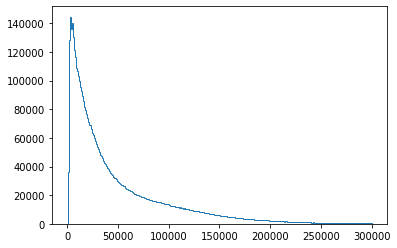

In [9]:
#plotting the total momentum of a daughter particle
from numpy import *
import matplotlib
import matplotlib.pyplot as plt

class Daughter:
  def __init__(self, name):
    self.PX=f["DecayTree/{}_PX".format(name)].array(library="np")
    self.PY=f["DecayTree/{}_PY".format(name)].array(library="np")
    self.PZ=f["DecayTree/{}_PZ".format(name)].array(library="np")
    self.PTOT=sqrt(square(self.PX)+square(self.PY)+square(self.PZ))#total momentum of the daughter particle
    self.ProbK=f["DecayTree/{}_ProbK".format(name)].array(library="np")
    self.ProbPi=f["DecayTree/{}_ProbPi".format(name)].array(library="np")

  def getTotalEnergy(self, mass):
    return  sqrt(square(self.PTOT)+mass**2)#total energy of the particle

#creating the istances for the three daughter particles
H1=Daughter('H1')
H2=Daughter('H2')
H3=Daughter('H3')
#plotting the hystogram
plt.hist(H1.PTOT,300,(0,300000),histtype='step'); #the semicolon avoid printing the all array



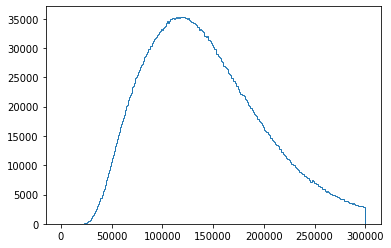

In [4]:
#Calculating the total momentum of the mother 
mother_ptot=sqrt(square(H1.PX+H2.PX+H3.PX)+square(H1.PY+H2.PY+H3.PY)+square(H1.PZ+H2.PZ+H3.PZ))


plt.hist(mother_ptot,300,(0,300000),histtype='step');

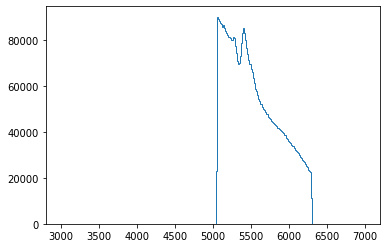

In [11]:
#total mass of the mother
massK=493.677
mass_mother=sqrt(square(H1.getTotalEnergy(massK)+H2.getTotalEnergy(massK)+H3.getTotalEnergy(massK))-square(mother_ptot))

plt.hist(mass_mother,300,(3000,7000),histtype='step');

#Does this match what we would expect from theory?

**ADD HERE EXPLANATION**

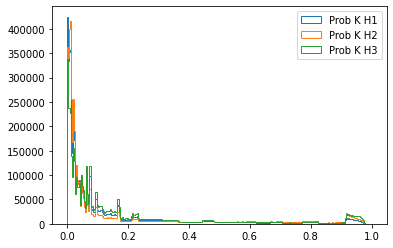

In [12]:
#Make plots of H1/H2/H3 _ProbK on one plot
plt.hist(H1.ProbK,300,(0,1),histtype='step',label='Prob K H1');
plt.hist(H2.ProbK,300,(0,1),histtype='step',label='Prob K H2');
plt.hist(H3.ProbK,300,(0,1),histtype='step',label='Prob K H3');
plt.legend(loc='upper right')

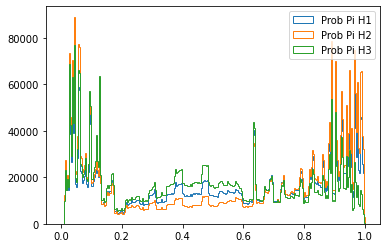

In [13]:
#Make plots of H1/H2/H3 _ProbPi on one plot
plt.hist(H1.ProbPi,300,(0,1),histtype='step',label='Prob Pi H1');
plt.hist(H2.ProbPi,300,(0,1),histtype='step',label='Prob Pi H2');
plt.hist(H3.ProbPi,300,(0,1),histtype='step',label='Prob Pi H3');
plt.legend(loc='upper right')

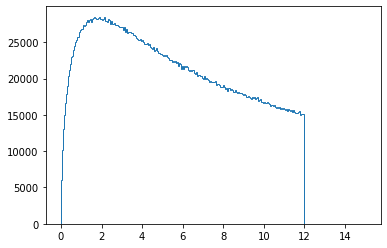

In [17]:
#make a plot of the B_VertexChi2
plt.hist(f["DecayTree/B_VertexChi2"].array(library="np"),300,(0,15),histtype='step',label='B vertex ki');